In [37]:
%%time

# -*- coding: utf-8 -*-
"""
cite: https://www.pyimagesearch.com/2020/04/20/detect-and-remove-duplicate-images-from-a-dataset-for-deep-learning/

The function accepts an image and hashSize and proceeds to:

Detect and remove duplicate images from a dataset for deep learning.
Convert the image to a single-channel grayscale image.
Resize the image according to the hashSize. 
The algorithm requires that the width of the image have exactly 1 more column than the height as is evident by the dimension tuple.
Compute the relative horizontal gradient between adjacent column pixels. This is now known as the 'difference image.'
Apply our hashing calculation and return the result.


dataset: The path to your input dataset, which contains duplicates that you’d like to prune out of the dataset
remove: Indicates whether duplicates should be removed (deleted permanently) or whether you want to conduct a “dry run” so you can visualize the duplicates on your screen and see the hashes in your terminal

"""
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import cv2
import os

def dhash(image, hashSize=8):
    # convert the image to grayscale and resize the grayscale image,
    # adding a single column (width) so we can compute the horizontal
    # gradient
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    # convert the difference image to a hash and return it
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

dataset = '/data/data/cpi_data/campaigns/2000_ARM/good_lowcutoff/'
remove=True
count = 0
# grab the paths to all images in our input dataset directory and
# then initialize our hashes dictionary
print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images(dataset))
hashes = {}
# loop over our image paths
for imagePath in imagePaths:
    # load the input image and compute the hash
    image = cv2.imread(imagePath)
    h = dhash(image)
    # grab all image paths with that hash, add the current image
    # path to it, and store the list back in the hashes dictionary
    p = hashes.get(h, [])
    p.append(imagePath)
    hashes[h] = p
    
# loop over the image hashes
for (h, hashedPaths) in hashes.items():
    # check to see if there is more than one image with the same hash
    if len(hashedPaths) > 1:
        # check to see if this is a dry run
        if remove is False:
            # initialize a montage to store all images with the same
            # hash
            montage = None
            # loop over all image paths with the same hash
            for p in hashedPaths:
                # load the input image and resize it to a fixed width
                # and heightG
                image = cv2.imread(p)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150, 150))
                # if our montage is None, initialize it
                if montage is None:
                    montage = image
                # otherwise, horizontally stack the images
                else:
                    montage = np.hstack([montage, image])
            # show the montage for the hash
            fig, ax = plt.subplots( nrows=1, ncols=1 ) 
            plt.imshow(montage)
            plt.show()
            
# otherwise, we'll be removing the duplicate images
        else:
            # loop over all image paths with the same hash *except*
            # for the first image in the list (since we want to keep
            # one, and only one, of the duplicate images)
            
            for p in hashedPaths[1:]:
                #os.remove(p)
                count +=1
print('removed: %d images' %count)

[INFO] computing image hashes...
removed: 4221 images
CPU times: user 10min 14s, sys: 31.5 s, total: 10min 46s
Wall time: 6min 17s


In [ ]:
hashes.items()

original


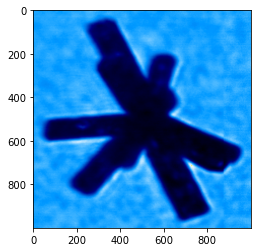

new image


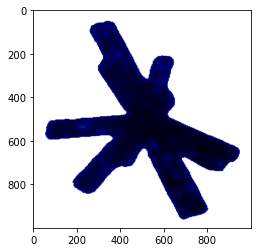

original


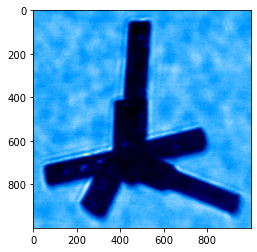

new image


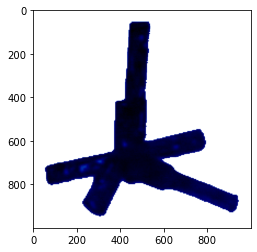

original


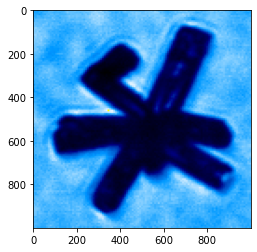

new image


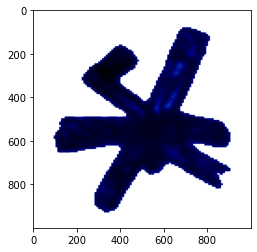

original


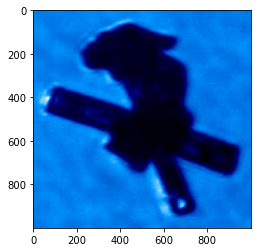

new image


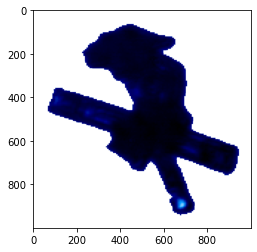

original


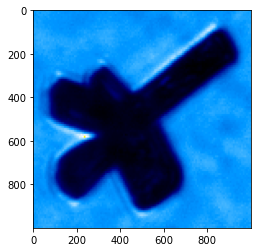

new image


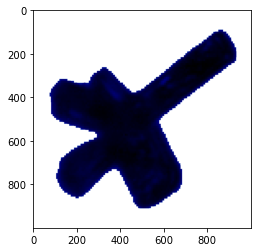

original


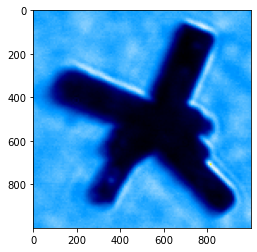

new image


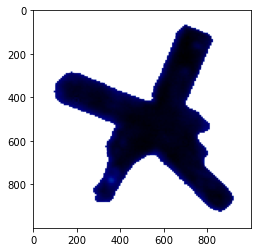

original


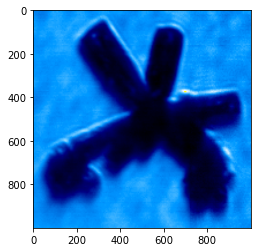

new image


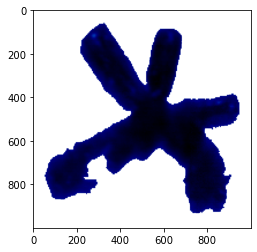

original


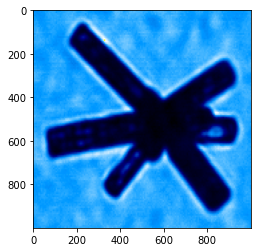

new image


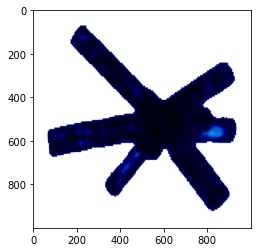

original


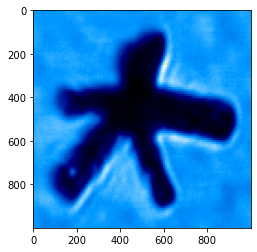

new image


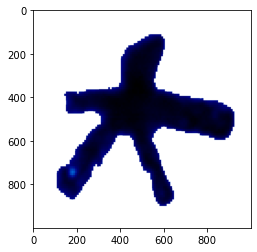

original


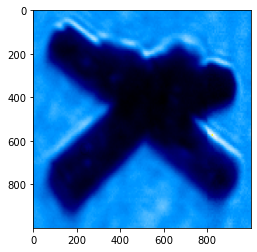

new image


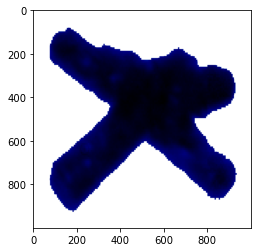

original


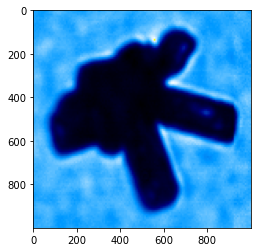

new image


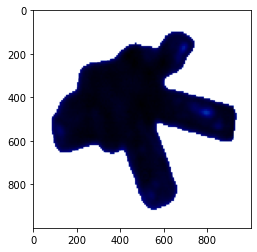

original


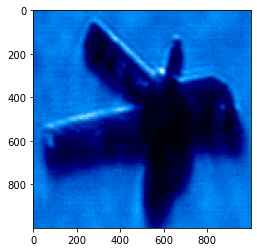

new image


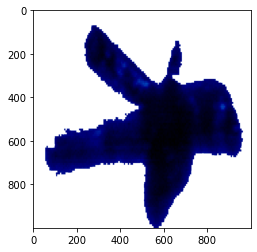

original


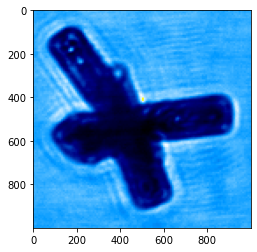

new image


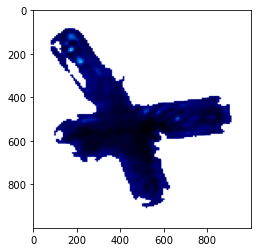

original


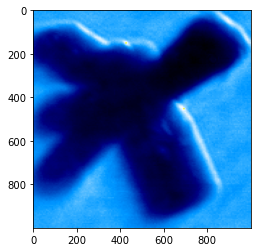

new image


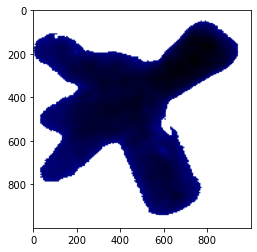

original


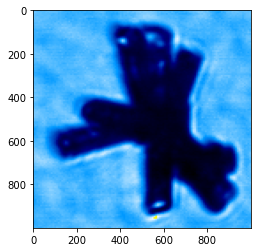

new image


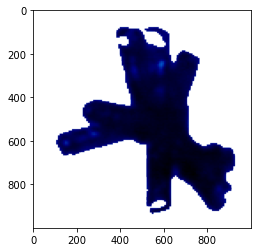

original


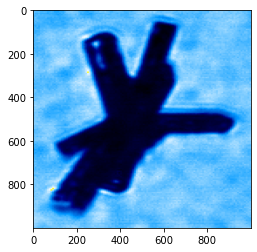

new image


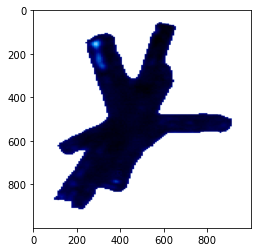

original


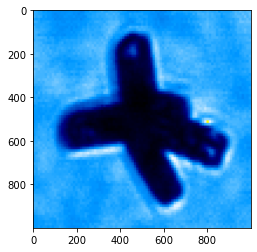

new image


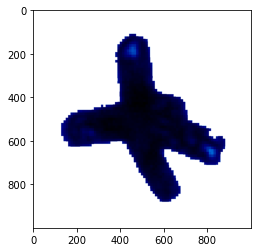

original


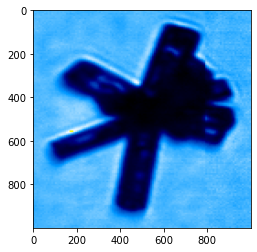

new image


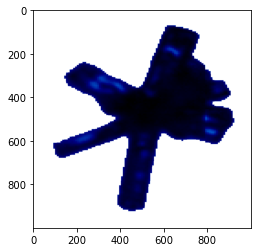

original


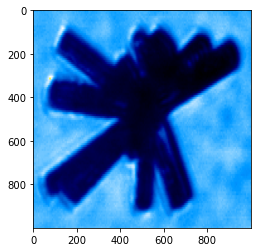

new image


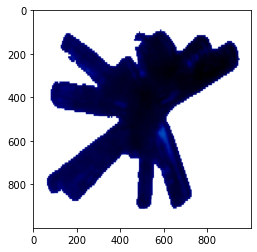

original


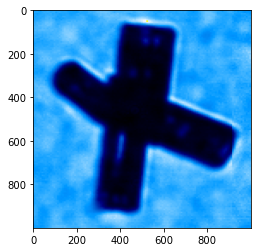

new image


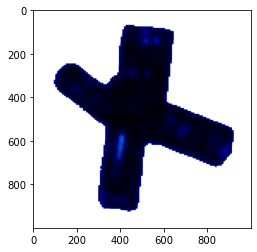

original


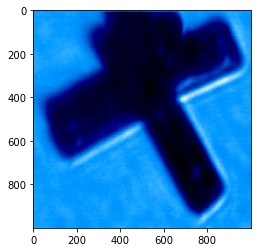

new image


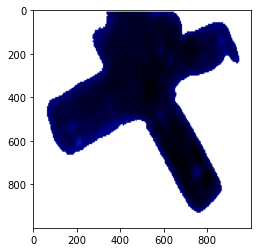

original


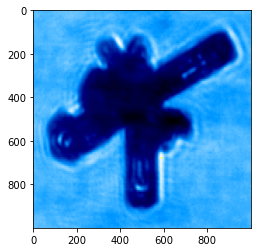

new image


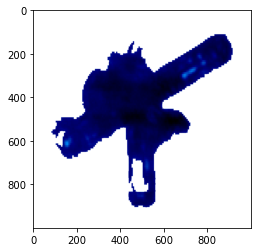

original


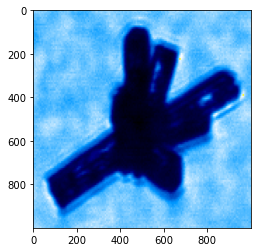

new image


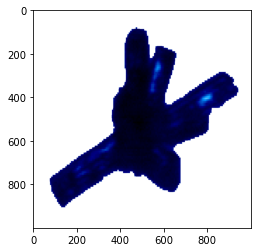

original


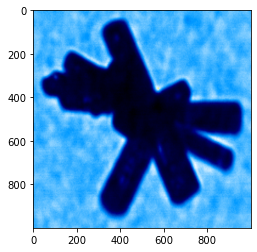

new image


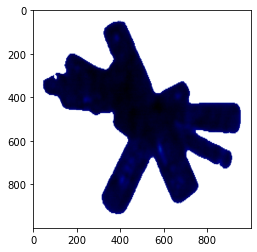

original


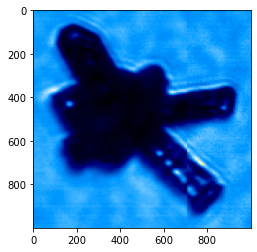

new image


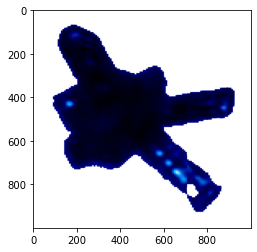

original


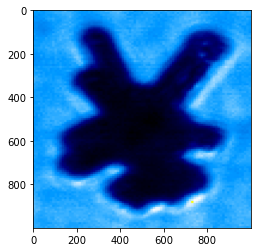

new image


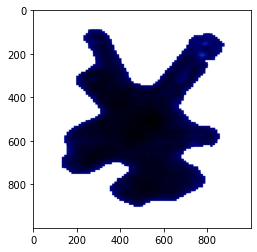

original


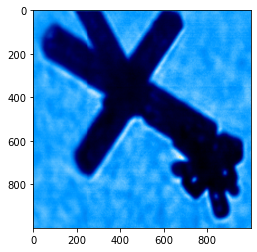

new image


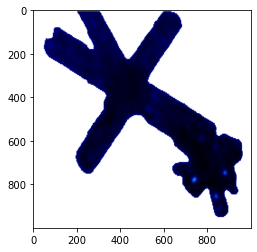

original


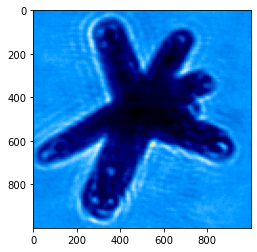

new image


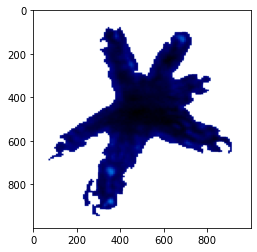

original


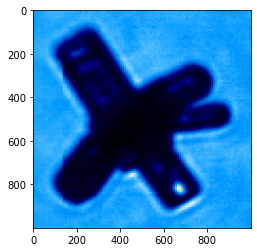

new image


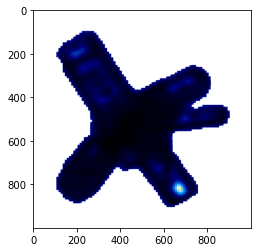

original


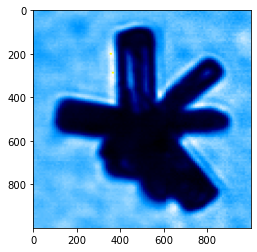

new image


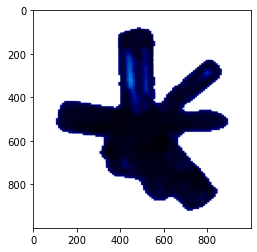

original


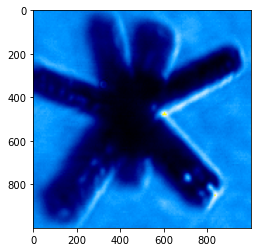

new image


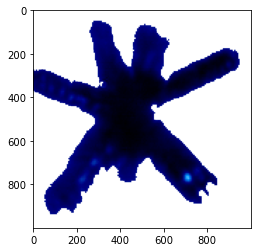

original


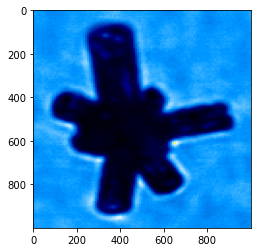

new image


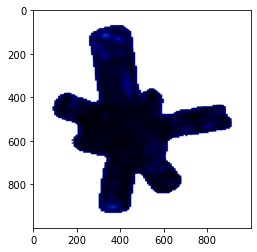

original


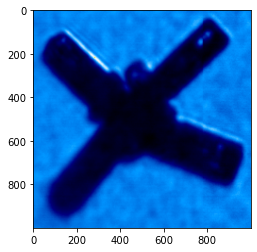

new image


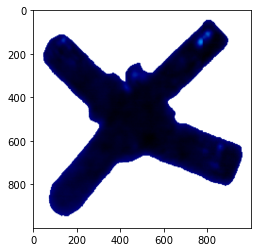

original


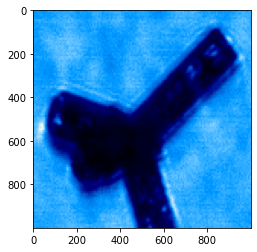

new image


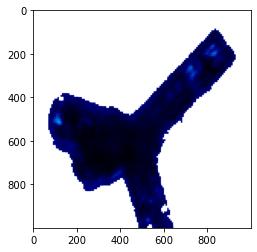

original


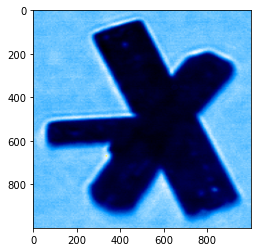

new image


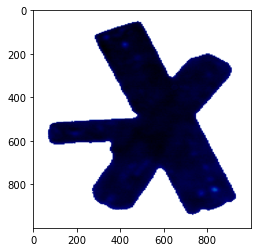

original


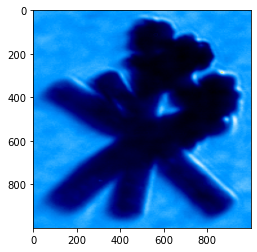

new image


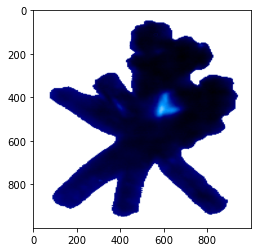

original


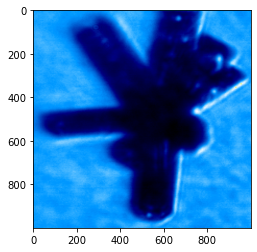

new image


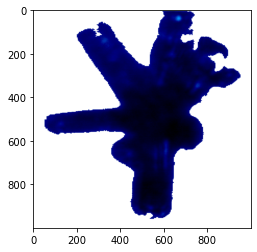

original


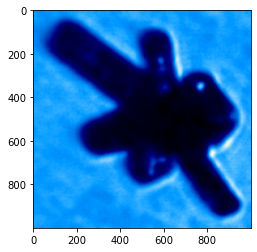

new image


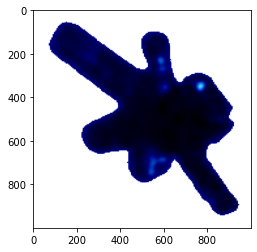

original


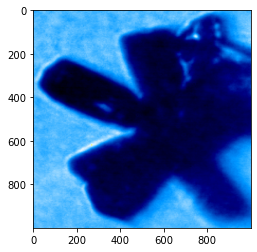

new image


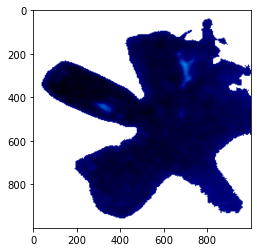

original


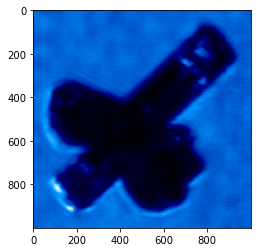

new image


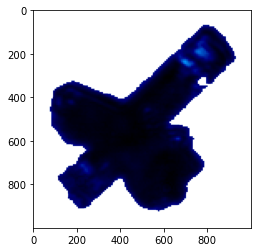

original


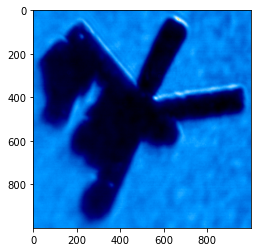

new image


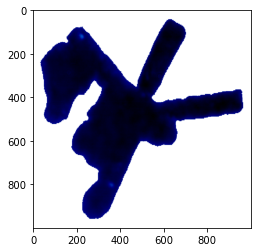

original


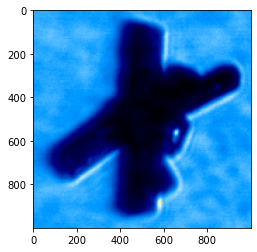

new image


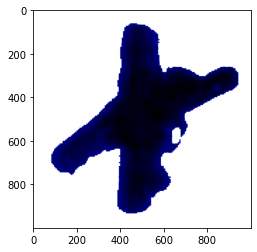

original


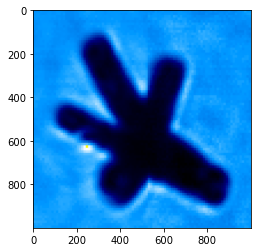

new image


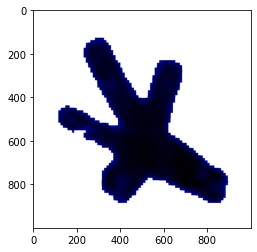

original


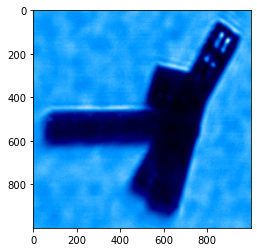

new image


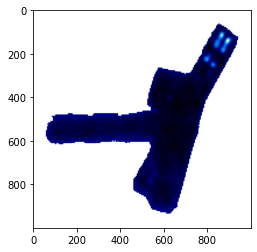

original


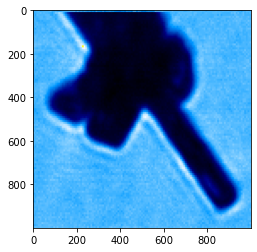

new image


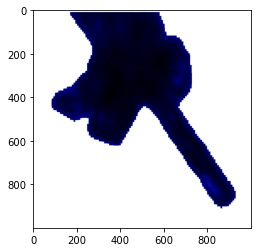

original


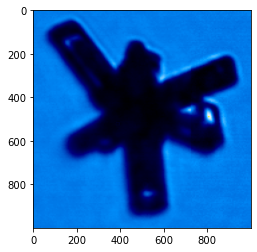

new image


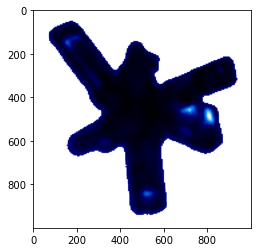

original


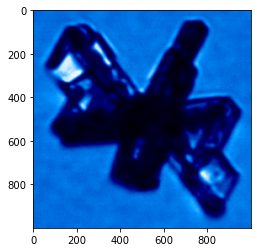

new image


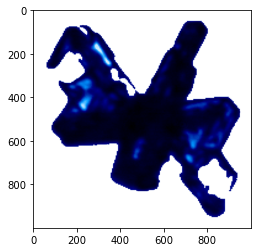

original


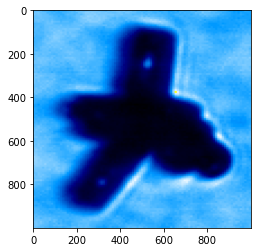

new image


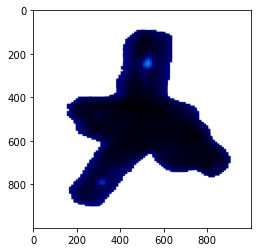

original


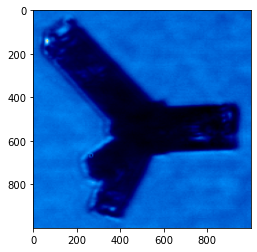

new image


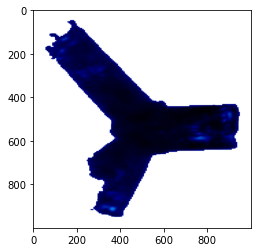

original


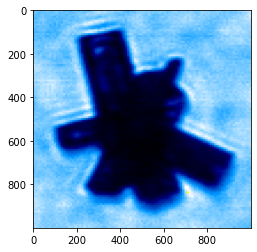

new image


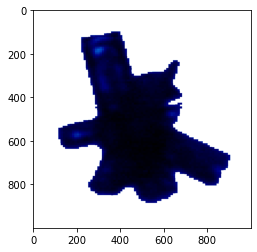

original


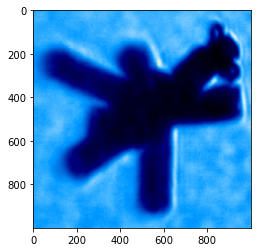

new image


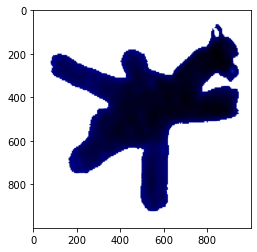

original


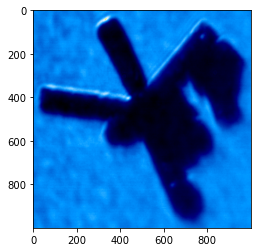

new image


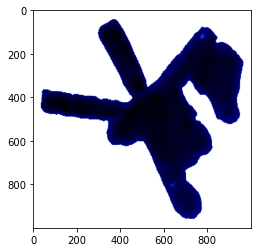

original


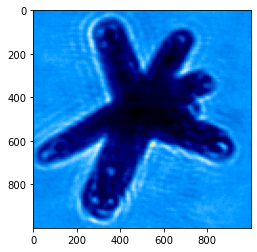

new image


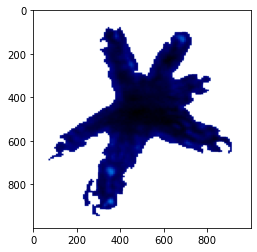

original


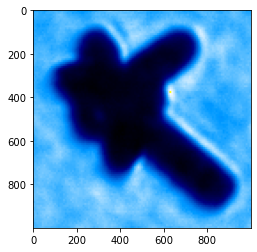

new image


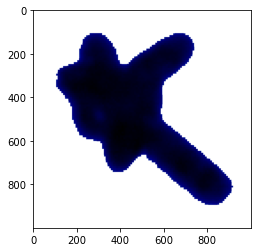

original


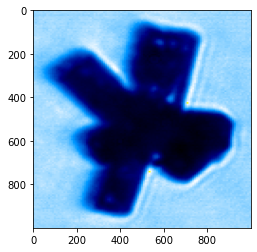

new image


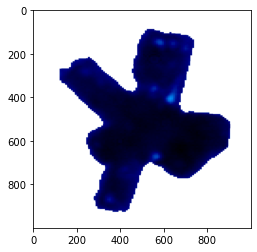

original


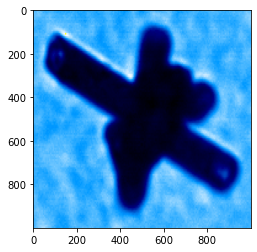

new image


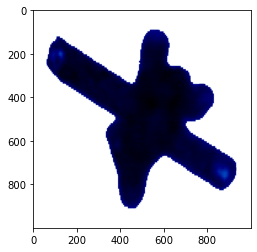

original


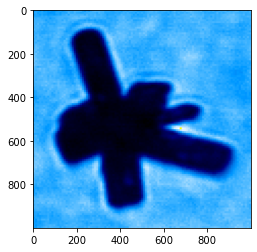

new image


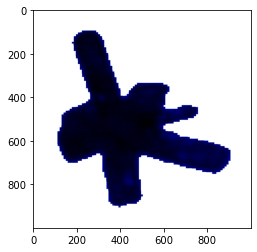

original


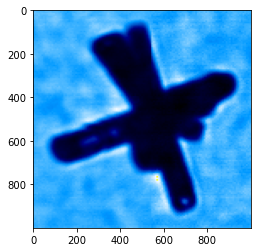

new image


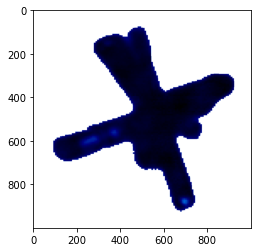

original


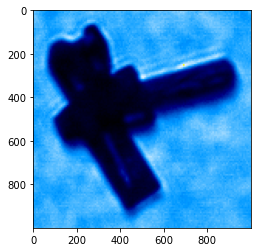

new image


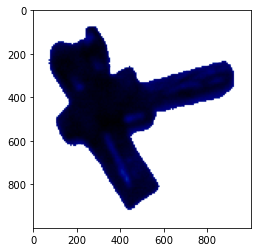

original


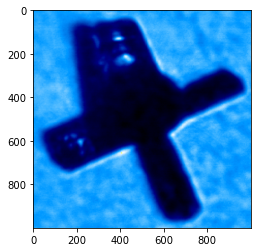

new image


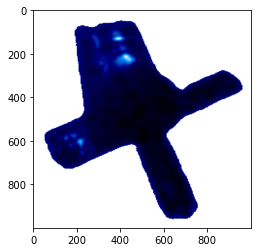

original


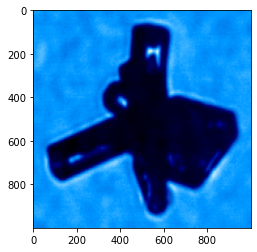

new image


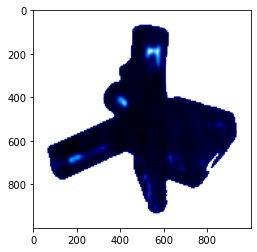

original


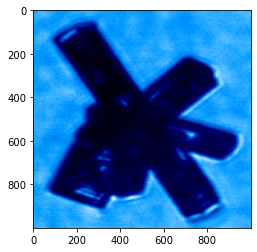

new image


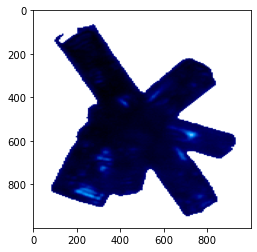

original


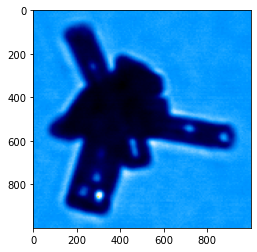

new image


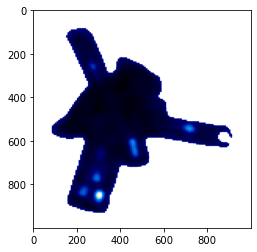

original


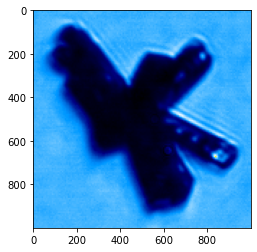

new image


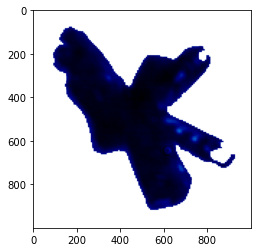

original


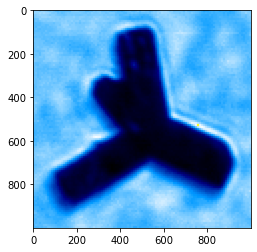

new image


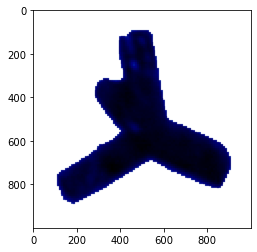

original


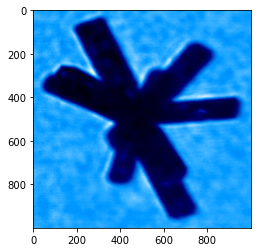

new image


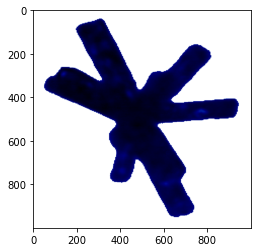

original


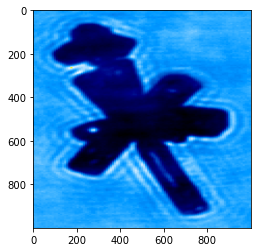

new image


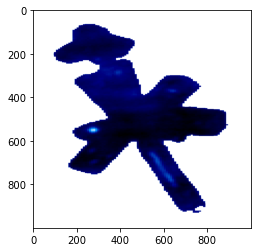

original


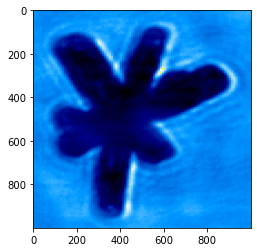

new image


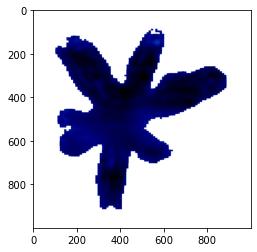

original


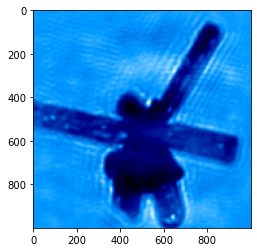

new image


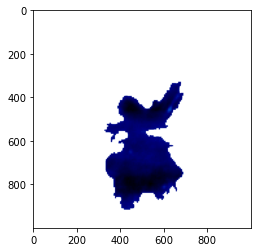

original


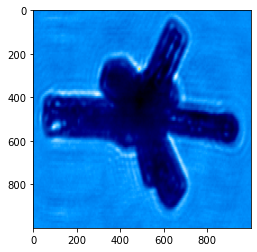

new image


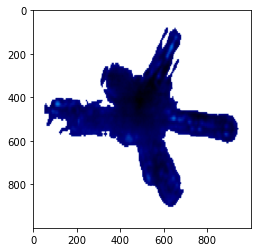

original


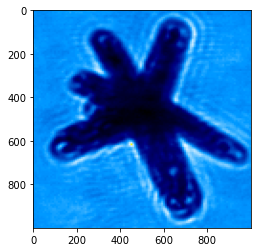

new image


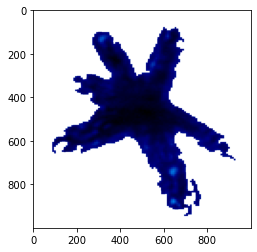

original


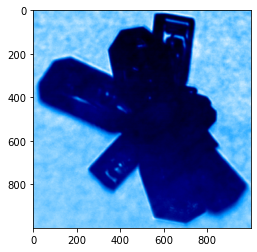

new image


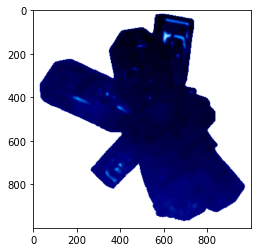

original


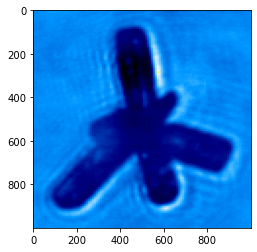

new image


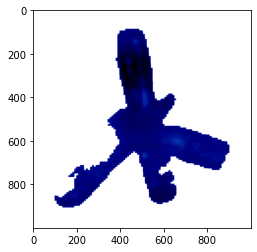

original


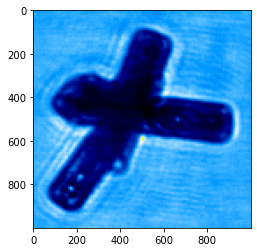

new image


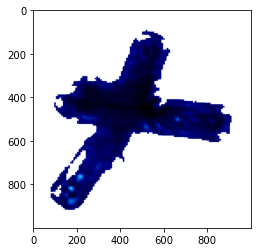

original


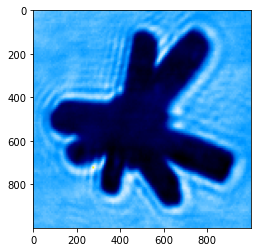

new image


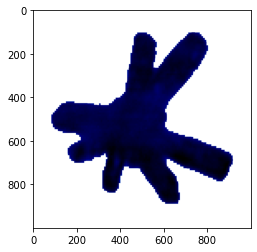

original


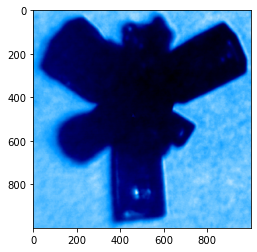

new image


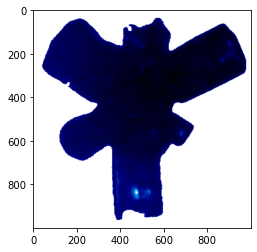

original


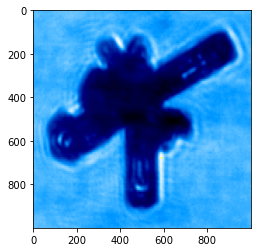

new image


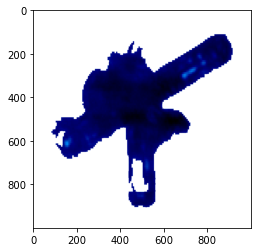

original


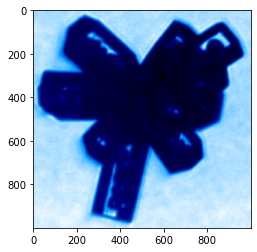

new image


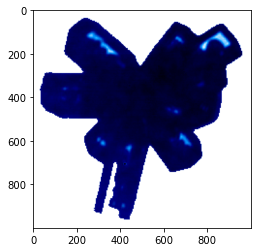

original


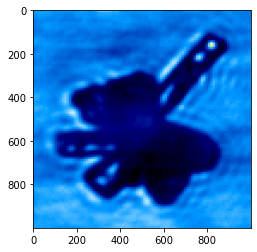

new image


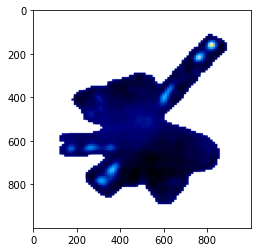

original


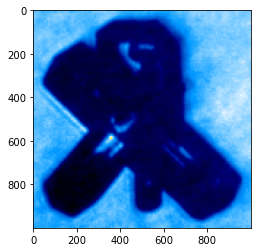

new image


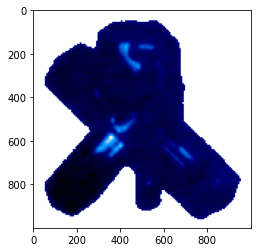

original


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

rootdir = 'cpi_data/training_datasets/hand_labeled_resized_multcampaigns_clean1/'
savedir = 'cpi_data/training_datasets/masked_background/'
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        
        image_og = cv2.imread(os.path.join(subdir, file), cv2.IMREAD_UNCHANGED)
        image_og =cv2.cvtColor(image_og, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(image_og, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)[1]

        # get largest contour
        contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        if len(contours) != 0:
            big_contour = max(contours, key=cv2.contourArea)

            # draw filled contour on black background
            mask = np.zeros_like(image_og)

            cv2.drawContours(mask, [big_contour], 0, (255,255,255), -1)

            # put mask into alpha channel of input
            new_image = cv2.cvtColor(image_og, cv2.COLOR_BGR2BGRA)
            new_image[:,:,3] = mask[:,:,0]


            # save result 
            direct = subdir.split('/')[-1]

#             if not os.path.exists(os.path.join(savedir,direct)):
#                 os.makedirs(os.path.join(savedir,direct), exist_ok=True)
#             cv2.imwrite(os.path.join(savedir,direct,file), new_image)


            # show images
            print('original')
            plt.imshow(image_og)
            plt.show()
    #         print('thresh')
    #         plt.imshow(thresh)
    #         plt.show()
    #         print('mask')
    #         plt.imshow(mask)
    #         plt.show()
            print('new image')
            plt.imshow(new_image)
            plt.show()
        
        
